# Improvements for AIAA Scitech Abstract

## Plan

1. Tapering ratio along the span

- <strike/>Assume that the stiffener's profile remain the same

- <strike/>Assume that skin and spar thicknesses will change linearly

 

2. Sizing variables
    
- <strike/>Four sizing variables for all stiffeners: Thickness and Dimensions

- <strike/>Assume that the stiffener's profile remain the same

- <strike/>One thickness of the spars at the root

- <strike/>One thickness for the skin at the root (assumed the same for lower and upper skins)
    
- <strike/>One thickness for the skin at the tip (assumed the same for lower and upper skins)

- <strike/>One thickness of the spars at the tip


3. Tubular beam element

- <strike/>Compute stresses and size beam

- Compare results against conventional wingbox

## Imports

In [1]:
from Structure import Structure
import numpy as np
from IPython.display import Math, display

show = lambda func: display(Math(func.__repr__()))

## Input Data

In [2]:
Cl = Structure.process_dist("""
 0. 0.07012725 0.1396002  0.20779006 0.27412298 0.33811438
 0.39940413 0.45778292 0.51319906 0.56574244 0.61561101 0.66307066
 0.7084175  0.75194759 0.79393547 0.83462059 0.87420005 0.91282594
 0.9506056  0.98760375 1.02384567 1.05932065 1.09398561 1.12776843
 1.16057106 1.19227226 1.22273008 1.25178397 1.27925667 1.30495596
 1.3286762  1.35019983""")

Cd = Structure.process_dist("""
 0 0.01634525 0.02443397 0.03061296 0.03503482 0.03792653
 0.03956237 0.04023399 0.0402226  0.03977798 0.03910679 0.03836955
 0.03768385 0.03713102 0.03676384 0.03661383 0.03669755 0.03702143
 0.03758554 0.03838613 0.03941739 0.04067269 0.04214514 0.04382809
 0.04571515 0.0478003  0.0500777  0.05254152 0.05518571 0.0580037
 0.06098806 0.06413016""")

inputs = dict(MAC = 1.265147796494402, # Mean Aerodynamic Chord [m]
cruise = True, # boolean depending on whether cruise or take-off is being considered
w_back = True, # will analyse the back wing if True
taper = 0.45, # [-]
rootchord = 1.6651718350228892, # [m]
thicknessChordRatio = 0.17, # [-]
xAC = 0.25, # [-] position of ac with respect to the chord
mtom = 3024.8012022968796, # maximum take-off mass from statistical data - Class I estimation
S1 = 9.910670535618632, 
S2 = 9.910670535618632, # surface areas of wing one and two
span1 = 8.209297146662843,
span2 = 8.209297146662843,
nmax = 3.43, # maximum load factor
Pmax = 17, # this is defined as maximum perimeter in Roskam, so i took top down view of the fuselage perimeter
lf = 7.348878876267166, # length of fuselage
wf = 1.38, # width of fuselage
m_pax = 88, # average mass of a passenger according to Google
n_prop = 12, # number of engines
n_pax = 5, # number of passengers (pilot included)
pos_fus = 2.9395515505068666, # fuselage centre of mass away from the nose
pos_lgear = 3.875, # landing gear position away from the nose
pos_frontwing = 0.5,
pos_backwing = 6.1, # positions of the wings away from the nose
m_prop = [502.6006543358783/12]*12, # list of mass of engines (so 30 kg per engine with nacelle and propeller)
pos_prop =  [-0.01628695, -0.01628695, -0.01628695, -0.01628695, -0.01628695, -0.01628695, 
             5.58371305,  5.58371305,  5.58371305,  5.58371305,  5.58371305,  5.58371305], # 8 on front wing and 8 on back wing
Mac = 0.002866846692576361, # aerodynamic moment around AC
flighttime = 1.5504351809662442, # [hr]
turnovertime = 2, # we dont actually need this xd
takeofftime = 262.839999999906/3600,
engineMass = 502.6006543358783 * 9.81 / 8,
Thover = 34311.7687171136/12,
Tcruise = 153.63377687614096,
p_pax = [1.75, 3.75, 3.75, 6, 6],
battery_pos = 0.5,
cargo_m = 35, cargo_pos = 6.5, battery_m = 886.1868116321529,
materialdata = '../data/materials.csv',
CL = Cl, CD = Cd, # Aerodynamics
Vcruise = 72.18676185339652, # Cruise speed [m/s]
)

## Compute Stresses

In [3]:
state = dict(nStrT=2, nStrB=1,
            thicknessOfSkin=1.3e-3, thicknessOfSpar=18.7*1e-3,
            thicknessOfStringer=1e-3, ntofit=20, stringerMat = dict(material='Al 7075', Condition='T6'),
               skinMat = dict(material='Al 7075', Condition='T6'))

In [4]:
struct = Structure(**(inputs | state ))
struct.compute_stresses(**state)

HAT-Stringer(a=0.00016651718350228894, x=-0.1, y=0.07358427817526642, bflange1=0.027752863917048155, bflange2=0.027752863917048155, tflange=0.027752863917048155, vflange=0.04162929587557223, t=0.001)
testing NC 468.84418635601634


[[[array([-0.49955155,  0.14153961]), -58226650.56654876],
  [array([ 0.49955155, -0.14153961]), 58226650.56654876]],
 [[array([-0.48054959,  0.14153961]), -267726849.7077633],
  [array([4.99551551e-01, 1.41681287e-04]), -12999580.562914677]],
 [[array([4.99551551e-01, 1.41681287e-04]), 22515951.70226746],
  [array([-0.48054959,  0.14153961]), 467357687.4051957]]]

In [5]:
show(struct.loads.Vy)
show(struct.loads.Mx)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

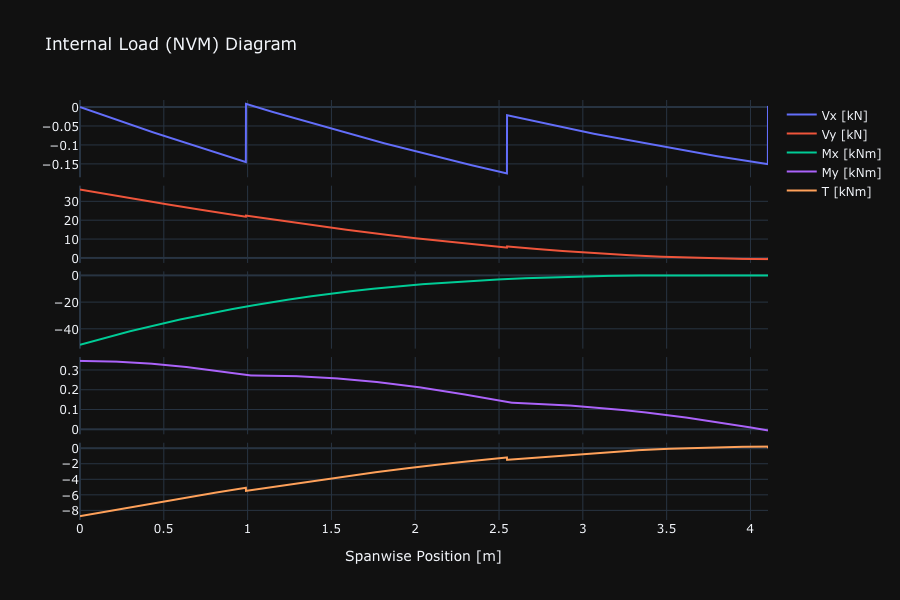

In [6]:
struct.plotNVMcruise()

## Sizing Root & Tip

In [7]:
p1 = struct.span/2 * 5/8
print([i[int(abs(i[1][1])>abs(i[0][1]))][1]*1e-6 for i in struct.compute_stresses(**state, point=0)],
      [i[int(abs(i[1][1])>abs(i[0][1]))][1]*1e-6 for i in struct.compute_stresses(**state, point=p1)],
      box := struct.loads.wing(0), box2 := struct.loads.wing(p1), sep="\n")

testing NC 468.84418635601634
testing NC 468.84418635601634
[-58.226650566548756, -267.7268497077633, 467.3576874051957]
[-6.40642466447479, -66.770726519846, 115.82473310152183]
Wingbox(Height=0.2830792119538912, Base=0.9991031010137335, Tsk = 0.0013, Tsp = 0.0187, Stringers = 3)
Wingbox(Height=0.18577073284474108, Base=0.6556614100402626, Tsk = 0.0013, Tsp = 0.0187, Stringers = 3)


In [8]:
stresses = [i[int(abs(i[1][1])>abs(i[0][1]))][1]*1e-6 for i in struct.compute_stresses(2, 1, 0.69e-3, 7.5e-3, point=p1)]
stresses

testing NC 468.84418635601634


[-12.641938670382837, -263.1092832324239, 455.89030377317897]

Thickness of spar is 7.5mm and for skin is 0.69 mm at 5/8 of the position along the span.

Interpolation: $\vec{t}(z) = \vec{m} \cdot z + \vec{t}_0$

In [9]:
t1, t2 = np.array([1.3, 18.7]), np.array([0.69, 7.5])
m = (t2 - t1) / (p1 - 0)
print(f'Slope, {m = } [mm / m]')

ttip = t1 + m * struct.span/2
print(f"Thickness at tip, {ttip = } [mm]")

Slope, m = array([-0.23777919, -4.36578179]) [mm / m]
Thickness at tip, ttip = array([0.324, 0.78 ]) [mm]


## Tubular Structure Analysis

**Structural Formulas for Torsion, Torsional Resistance and Shear Flows**

$T = 2 \cdot A_m \cdot q$

$J = 2 I_{xx} = 2 I_{yy} = 2 \cdot \pi \cdot R^3 \cdot t$

$q_s = \frac{V_y t R^2}{I_{xx}} (\cos{\theta} - 1) - \frac{V_x t R^2}{I_{yy}} \sin{\theta} = \frac{t R^2}{I_{xx}} \cdot \left[ V_y (\cos{\theta} - 1) - V_x \sin{\theta} \right]$

**Column Buckling**

$P_{\text{cr}} = \frac{\pi^2 \cdot E \cdot I}{L^2}$

**Shell Buckling**

$\phi = \frac{1}{16} \sqrt{\frac{R}{t}}$

$\gamma = 1 - 0.731 \cdot \sqrt{1 - e^{-\phi}}$

$\sigma_{cr} = \gamma \cdot \frac{E t}{R \sqrt{3 \cdot (1 - \nu^2)}}$

$\tau_{cr} = \frac{0.747 \cdot \gamma^{0.75} \cdot E}{(R / t)^{1.25} \cdot (L / R)^{0.5}}$

$\frac{\tau}{\tau_{cr}} + \frac{\sigma}{\sigma_{cr}} = 1$


In [10]:
import numpy as np

class Tube:
    th = np.linspace(0, 2 * np.pi, 500)
    
    def __init__(self, Router, thickness, length):
        self.Ro, self.t, self.L = Router, thickness, length
        self.Ri = Router - thickness
        self.R = (self.Ro + self.Ri) / 2
        self.A = 2 * np.pi * self.R * self.t
        self.Am = np.pi * self.R ** 2
        self.Ixx = self.Iyy = np.pi * self.R ** 3 * self.t
        self.J = 2 * self.Ixx
        self.tau = self.o = self.Y = None

    ox, oy = lambda self, Mx, y: Mx * y / self.Ixx, lambda self, My, x: My * x / self.Iyy
    qs0 = lambda self, T: T / (2 * self.Am)
    qs = lambda self, Vx, Vy, theta: (self.t * self.R**2 / self.Ixx) * (Vy * (np.cos(theta) - 1) - Vx * np.sin(theta))
    
    def taumax(self, Vx, Vy, x, y, T=0):
        Ttot = Vy * x - Vx * y + T
        q = self.qs(Vx, Vy, self.th) + self.qs0(Ttot)
        self.tau = q / self.t
        pmax = np.argmax(np.abs(self.tau))
        return self.tau[pmax], (self.R, self.th[pmax])

    def omax(self, Mx, My):
        xs, ys = self.Ro * np.cos(self.th), self.Ro * np.sin(self.th)
        self.o = self.ox(Mx, ys) + self.oy(-My, xs)
        pmax = np.argmax(np.abs(self.o))
        return self.o[pmax], (self.Ro, self.th[pmax])
    
    def Ymax(self):
        if self.tau is None or self.o is None:
            return None
        self.Y = np.sqrt(np.power(self.o, 2) + 3 * np.power(self.tau, 2))
        pmax = np.argmax(self.Y)
        return self.Y[pmax], (self.R, self.th[pmax])
    
    def shellcr(self, E):
        Z = self.L ** 2 * np.sqrt(1 - 0.33 ** 2) / (self.Ro * self.t)
        phi = np.sqrt(self.Ro / self.t) / 16
        gamma = 1 - 0.731 * (1 - np.exp(-phi))
        ocrit = gamma * E * self.t / (self.Ro * np.sqrt(3 - 0.99 ** 2))
        taucrit = 0.747 * gamma ** 0.75 * E / ((self.Ro / self.t) ** 1.25 * (self.L / self.Ro) ** 0.5)
        return ocrit, taucrit
        
    
    ocr = lambda self, E: np.pi ** 2 * E * self.Ixx / (self.A * self.L ** 2)
    mass = lambda self, density: self.A * self.L * density
    
    __str__ = __repr__ = lambda self: f"{self.__class__.__name__}({', '.join(f'{k}={v}' for k, v in self.__dict__.items())})"
    

## Tubular Structure Design

In [11]:
Vx, Vy, Mx, My, T = [struct.loads.__dict__[load](0) for load in "Vx, Vy, Mx, My, T".split(", ")]
E = 71.7e9

for i in range(4):
    t = 4.12 + i/100
    tube = Tube(box.h/2, t*1e-3, struct.span)
    oshcr, taushcr = tube.shellcr(E)
    print("Thickness [mm]:", t)
    print("Mass [kg]:", tube.mass(2810))
    print("Critical column buckling stress [MPa]:", (ocr := tube.ocr(E))*1e-6)
    print("Critical shell buckling normal and shear stress [MPa]:", oshcr * 1e-6, taushcr * 1e-6)
    print("Yield Strength Aluminum 7075-T6 [MPa]:", (oy := 468843680)*1e-6)
    print("Maximum Normal Stress [MPa]:", (omax := tube.omax(Mx, My)[0])*1e-6)
    print("Maximum Shear Stress [MPa]:", (taumax := tube.taumax(Vx, Vy, 0, 0, T)[0])*1e-6)
    print("Maximum Von Mises Stress [MPa]:", (Ymax := tube.Ymax()[0])*1e-6)
    print(f"""The box is {'not ' if abs(omax) < ocr else ''}failing in column buckling,
{'not ' if abs(Ymax) < oy else ''}failing in overload and
{'not ' if abs(taumax) / taushcr + abs(omax) / oshcr < 1 else ''}failing in shell buckling.
""")

Thickness [mm]: 4.12
Mass [kg]: 83.2913865757565
Critical column buckling stress [MPa]: 102.14059358875464
Critical shell buckling normal and shear stress [MPa]: 1139.2377570487242 69.896509645359
Yield Strength Aluminum 7075-T6 [MPa]: 468.84368
Maximum Normal Stress [MPa]: -209.36232492621482
Maximum Shear Stress [MPa]: -57.496725967350095
Maximum Von Mises Stress [MPa]: 219.50789516163377
The box is failing in column buckling,
not failing in overload and
failing in shell buckling.

Thickness [mm]: 4.13
Mass [kg]: 83.49055709747981
Critical column buckling stress [MPa]: 102.13327074308634
Critical shell buckling normal and shear stress [MPa]: 1142.3340277336333 70.1238843578596
Yield Strength Aluminum 7075-T6 [MPa]: 468.84368
Maximum Normal Stress [MPa]: -208.877856820736
Maximum Shear Stress [MPa]: -57.36018568007201
Maximum Von Mises Stress [MPa]: 218.99882763132248
The box is failing in column buckling,
not failing in overload and
failing in shell buckling.

Thickness [mm]: 4.14
Ma

Thickness of the tube should be a constant 4.14 mm.

In [12]:
%%bash

git add ..
git commit -m "Committed to Structures $(date +'on %B %e at %H:%M')"
git push

[main b654bd0] Committed to Structures on November 23 at 15:17
 1 file changed, 28 insertions(+), 28 deletions(-)


To github.com:chezzoba/DSE.git
   635ddff..b654bd0  main -> main
